All data in this challenge is taken from the Book-Crossing Dataset and can be downloaded from this website.
http://www2.informatik.uni-freiburg.de/~cziegler/BX/

About this Dataset:

    The Book-Crossing dataset comprises 3 tables.
BX-Users
Contains the users. Note that user IDs (`User-ID`) have been anonymized and map to integers. Demographic data is provided (`Location`, `Age`) if available. Otherwise, these fields contain NULL-values.

BX-Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (`Book-Title`, `Book-Author`, `Year-Of-Publication`, `Publisher`), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (`Image-URL-S`, `Image-URL-M`, `Image-URL-L`), i.e., small, medium, large. These URLs point to the Amazon web site.

BX-Book-Ratings
Contains the book rating information. Ratings (`Book-Rating`) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [14]:
#Download the dataset
#!curl -o BX-CSV.zip http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.8M  100 24.8M    0     0   301k      0  0:01:24  0:01:24 --:--:--  668k 6083k    0     0   468k      0  0:00:54  0:00:12  0:00:42  364k 294k      0  0:01:26  0:00:48  0:00:38  133k.8M    0     0   281k      0  0:01:30  0:00:54  0:00:36  154k16.7M    0     0   268k      0  0:01:35  0:01:03  0:00:32  257k 0     0   268k      0  0:01:34  0:01:07  0:00:27  278k5 18.8M    0     0   268k      0  0:01:34  0:01:11  0:00:23  272k


In [32]:
#!gunzip -S BXCSV.zip

gunzip: standard input is a terminal -- ignoring


In [2]:
#!wc -l BX-Book-Ratings.csv

In [3]:
#!tail -1149781 BX-Book-Ratings.csv > BX-Book-Ratings-Clean.csv

In [2]:
#Some idiosyncracies with the data require me to skip bad lines and seperate columns manually
#Had to encode the CSV to work
#Update: pandas has built in arguments to handle this when reading in data.

ratings = pd.read_csv('BX-Book-Ratings.csv', encoding='ISO-8859–1',on_bad_lines='skip',quotechar='"',sep=";",escapechar= "\\")
books = pd.read_csv('BX-Books.csv', encoding='ISO-8859–1',on_bad_lines='skip',quotechar='"',sep=";",escapechar= "\\")
users = pd.read_csv('BX-Users.csv', encoding='ISO-8859–1',on_bad_lines='skip',quotechar='"',sep=";",escapechar= "\\")


In [3]:
#display 5 rows of Books
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.shape

(271379, 8)

In [7]:
#display the ratings
ratings.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
ratings.shape

(1149780, 3)

In [9]:
#display the users
users.head()



,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
users.shape

(278858, 3)

Starting with the Book Data,lets drop columns which we know aren't going to be of much use. After this we can start evaluating comparative data :)


In [4]:
#code to drop cols and return an updated 'books' dataframe.
books.drop(['Image-URL-S','Image-URL-M', 'Image-URL-L'], axis=1,inplace=True)
print(type(books))
books.head

<class 'pandas.core.frame.DataFrame'>


<bound method NDFrame.head of               ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271374  0440400988                         There's a Bat in Bunk Five   
271375  0525447644                            From One to One Hundred   
271376  006008667X  Lily Dale : The True Story of the Town that Ta...   
271377  0192126040                        Republic (World's Classics)   
271378  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author  Year-Of-Publication  \
0         Mark P. O. Morford            

In [5]:
#code to check if nulls exist in Data Frame
print(books['Book-Title'].isnull().values.any())
print(books['Book-Author'].isnull().values.any())
print(books['Year-Of-Publication'].isnull().values.any())
print(books['Publisher'].isnull().values.any())

print()

#code to count the # of Nulls in respective columns.
print(books['Book-Author'].isnull().sum())
print(books['Publisher'].isnull().sum())


False
True
False
True

1
2


In [6]:
#We are going to fix occurences of nulls and set them to 'other' instead of Null.


print(books.loc[(books['Book-Author'].isnull()),:])
print(books.loc[(books['Publisher'].isnull()),:])
books['Book-Author']=books['Book-Author'].fillna("other")
books['Publisher']=books['Book-Author'].fillna("none provided")

              ISBN                                         Book-Title  \
187700  9627982032  The Credit Suisse Guide to Managing Your Perso...   

       Book-Author  Year-Of-Publication                       Publisher  
187700         NaN                 1995  Edinburgh Financial Publishing  
              ISBN       Book-Title      Book-Author  Year-Of-Publication  \
128896  193169656X      Tyrant Moon  Elaine Corvidae                 2002   
129043  1931696993  Finders Keepers  Linnea Sinclair                 2001   

       Publisher  
128896       NaN  
129043       NaN  


In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [8]:
books.head(-1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright,2001,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este,1991,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,E. J. W. Barber
...,...,...,...,...,...
271373,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Robin Wright
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Paula Danziger
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Teri Sloat
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,Christine Wicker


Next we're going to apply the same investigative methods to the Ratings and the Users. By the end I expect to find a correlation between the datasets


In [9]:
"""
My first idea is to exclude NaN value ages and also any strange age values. 
I am more interested in age groups 10-90 anything above or below this range doesn't seem feasible or worthwhile.
"""

users.shape

(278858, 3)

In [10]:
users["Age"].unique()
#as you can see, there are people who are above the age 100 and below 10 years old.
#code to exclude them below

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [11]:
#turn unwanted values into NaN
users.loc[ (users['Age'] > 90) | (users['Age']<10) ] = np.nan
#drop NaN values
users.dropna(inplace=True)


age_avg = users['Age'].mean()
print(users.shape)
print(age_avg)

users

(166597, 3)
34.754311302124286


,User-ID,Location,Age
1,2.0,"stockton, california, usa",18.0
3,4.0,"porto, v.n.gaia, portugal",17.0
5,6.0,"santa monica, california, usa",61.0
9,10.0,"albacete, wisconsin, spain",26.0
10,11.0,"melbourne, victoria, australia",14.0
...,...,...,...
278848,278849.0,"georgetown, ontario, canada",23.0
278850,278851.0,"dallas, texas, usa",33.0
278851,278852.0,"brisbane, queensland, australia",32.0
278852,278853.0,"stranraer, n/a, united kingdom",17.0


In [12]:
#I am also splitting the city,state,country up into separate columns for further classification/analysis
location = users.Location.str.split(', ', expand=True)
users['City'] = location[0].str.title()
users['State'] = location[1].str.title()
users['Country'] = location[2].str.title()

In [13]:
users.head(-1)

,User-ID,Location,Age,City,State,Country
1,2.0,"stockton, california, usa",18.0,Stockton,California,Usa
3,4.0,"porto, v.n.gaia, portugal",17.0,Porto,V.N.Gaia,Portugal
5,6.0,"santa monica, california, usa",61.0,Santa Monica,California,Usa
9,10.0,"albacete, wisconsin, spain",26.0,Albacete,Wisconsin,Spain
10,11.0,"melbourne, victoria, australia",14.0,Melbourne,Victoria,Australia
...,...,...,...,...,...,...
278845,278846.0,"toronto, ontario, canada",23.0,Toronto,Ontario,Canada
278848,278849.0,"georgetown, ontario, canada",23.0,Georgetown,Ontario,Canada
278850,278851.0,"dallas, texas, usa",33.0,Dallas,Texas,Usa
278851,278852.0,"brisbane, queensland, australia",32.0,Brisbane,Queensland,Australia


that does it for User Data, lets skim through ratings.

In [14]:
ratings.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [15]:
"""
Looking back at the Ratings Data, I see that ISBN is used both in the Books set as well as here. 
It appears USER-ID is also connected which is equally interesting and important.

To tie all of this research together, I will merge Ratings with users
so that ratings has everything I am looking for.
"""

drop_duplicate_ratings = ratings.drop_duplicates()

#remove implicit data
explicit_book_ratings = drop_duplicate_ratings[drop_duplicate_ratings['Book-Rating'] > 0]

#keep relevant books according to current year

books[books['Year-Of-Publication'] > 0]
books[books['Year-Of-Publication'] < 2023]


#merge Users and Ratings dataset
reviews_and_users = pd.merge(left=explicit_book_ratings,right= books, how = 'inner').merge(users, how = 'inner')
reviews_and_users = reviews_and_users.drop_duplicates()

#Dataset Cleaning
reviews_and_users = reviews_and_users.drop(columns = ['Location'])
reviews_and_users = reviews_and_users.rename(columns={"User-ID": "User ID", "Book-Rating": "Book Rating", "Book-Author": "Book Author", "Book-Title": "Book Title","Year-Of-Publication": "Publication Year"})
reviews_and_users['Book Author'] = reviews_and_users['Book Author'].str.title()

In [16]:
#further cleaning & also averaging ratings by book title.

avg_rating = reviews_and_users.groupby(['Book Title'])['Book Rating'].mean()
avg_rating = avg_rating.reset_index().rename(columns = {'Book Rating': 'Average Rating'})
avg_rating.head(15)


,Book Title,Average Rating
0,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
1,Dark Justice,10.000000
2,Earth Prayers From around the World: 365 Pray...,8.333333
3,Final Fantasy Anthology: Official Strategy Gu...,10.000000
4,Flight of Fancy: American Heiresses (Zebra Ba...,8.000000
5,Garfield Bigger and Better (Garfield (Numbere...,7.000000
6,God's Little Promise Book,9.000000
7,Good Wives: Image and Reality in the Lives of...,8.000000
8,Goosebumps Monster Edition 1: Welcome to Dead...,8.000000
9,Highland Desire (Zebra Splendor Historical Ro...,7.000000


In [17]:
reviews_and_users = reviews_and_users.merge(avg_rating, on = 'Book Title')

reviews_and_users.head(-1)

,User ID,ISBN,Book Rating,Book Title,Book Author,Publication Year,Publisher,Age,City,State,Country,Average Rating
0,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Philip Prowse,16.0,Rijeka,N/A,Croatia,3.000000
1,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Sue Leather,16.0,Rijeka,N/A,Croatia,6.000000
2,16877,038550120X,9,A Painted House,John Grisham,2001,JOHN GRISHAM,37.0,Houston,Arkansas,Usa,7.608696
3,21340,038550120X,9,A Painted House,John Grisham,2001,JOHN GRISHAM,45.0,Holton,Kansas,Usa,7.608696
4,21356,038550120X,7,A Painted House,John Grisham,2001,JOHN GRISHAM,56.0,Westwood,New Jersey,Usa,7.608696
...,...,...,...,...,...,...,...,...,...,...,...,...
267121,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Angela Johnson,13.0,Arlington Heights,Illinois,Usa,10.000000
267122,276660,0583307841,8,ROBOT RACE (MICRO ADV 6),David Antony Kroft,1985,David Antony Kroft,15.0,Singapore,N/A,Singapore,8.000000
267123,276664,0004703723,9,Dictionary Of Economics-2Nd Ed,Christopher Pass,1991,Christopher Pass,31.0,Daventry,England,United Kingdom,9.000000
267124,276664,0140136908,7,History of Economic Thought (Penguin Economics),William J. Barber,1992,William J. Barber,31.0,Daventry,England,United Kingdom,7.000000


We know the Average Age is 34.75 and we have began to give each book a weight according to the Average Rating.

The next phase is to histogram the data and understand if our Dataset is doing what we want it to do.

# Data Visualization

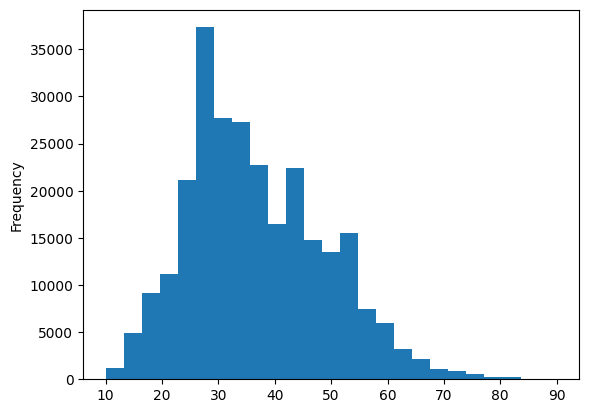

In [18]:
reviews_and_users['Age'].plot(kind='hist', bins=25)
display()

A majority of books purchased by our users were published between 1500 and 2000, with a mean of 1965.35


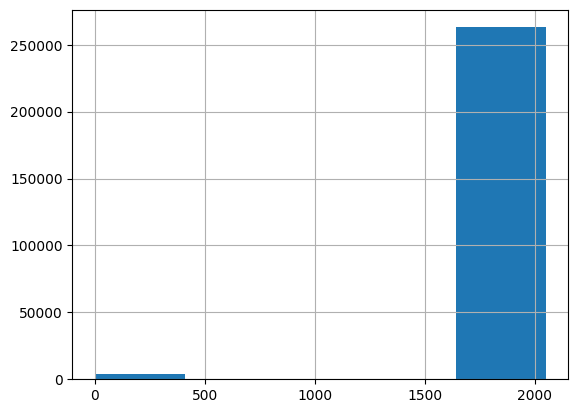

In [19]:
year_mean = reviews_and_users["Publication Year"].mean()
print("A majority of books purchased by our users were published between 1500 and 2000, with a mean of {:.2f}".format(year_mean))

reviews_and_users['Publication Year'].hist(bins=5)
display()



Below I track how many instances of books exist that have an average of 10.

In [20]:
rated_10 = reviews_and_users.loc[reviews_and_users['Average Rating'] ==10]
rated_10 = rated_10.drop(columns = ['User ID','ISBN','Book Author',"Publication Year","Publisher","Age","City","State","Country","Book Rating"])
rated_10

,Book Title,Average Rating
5984,Collected Poems of Edna St. Vincent Millay,10.0
6027,"Aristocrats: Caroline, Emily, Louisa, and Sara...",10.0
6104,Artist's Handbook of Materials and Techniques,10.0
6105,Artist's Handbook of Materials and Techniques,10.0
6125,Perfume: The Ultimate Guide to the World's Fin...,10.0
...,...,...
267090,The Last Run : A true story of rescue and rede...,10.0
267104,de Profundis,10.0
267107,If You Give a Mouse a Cookie/Mini Book and Mou...,10.0
267109,Providence: The Story of a Fifty Year Vision Q...,10.0


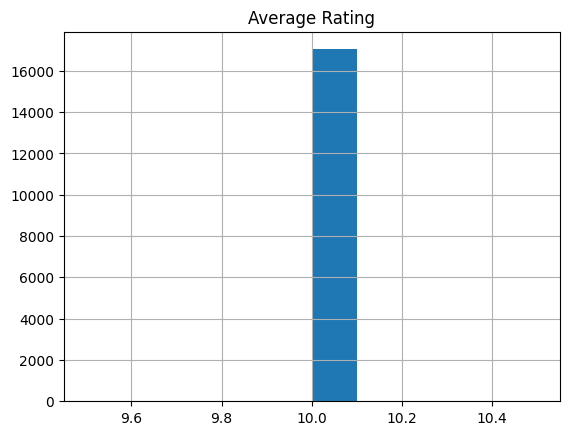

In [21]:

rated_10.hist()
display()

# Frequently Reviewed Books
Over 16,000 instances of books rated at a maximum of 10 exist. 
I have realized though that this isn't the greatest way of recommending to others, there could be other outliers.

Instead I want to find the most frequently reviewed books because there is more to recommend there.



In [22]:
#Creating a new 'Frequency' column by adding together mean scores of each book to determine 
#which was most rated. Top 10 Style.
reviews_and_users['Frequency'] = reviews_and_users['Book Title'].map(reviews_and_users['Book Title'].value_counts())
rating_and_frequency = reviews_and_users[['Book Title', 'Average Rating', 'Frequency']].groupby('Book Title').mean().sort_values('Frequency', ascending=False).head(10)


rating_and_frequency

,Average Rating,Frequency
Book Title,,
Wild Animus,4.486200,471.0
The Lovely Bones: A Novel,8.252137,468.0
The Da Vinci Code,8.433862,378.0
The Secret Life of Bees,8.476534,277.0
Bridget Jones's Diary,7.803846,260.0
Angels &amp; Demons,8.067194,253.0
Life of Pi,8.096774,248.0
The Nanny Diaries: A Novel,7.522449,245.0
Harry Potter and the Chamber of Secrets (Book 2),8.884298,242.0


NameError: name 'final_frequency' is not defined

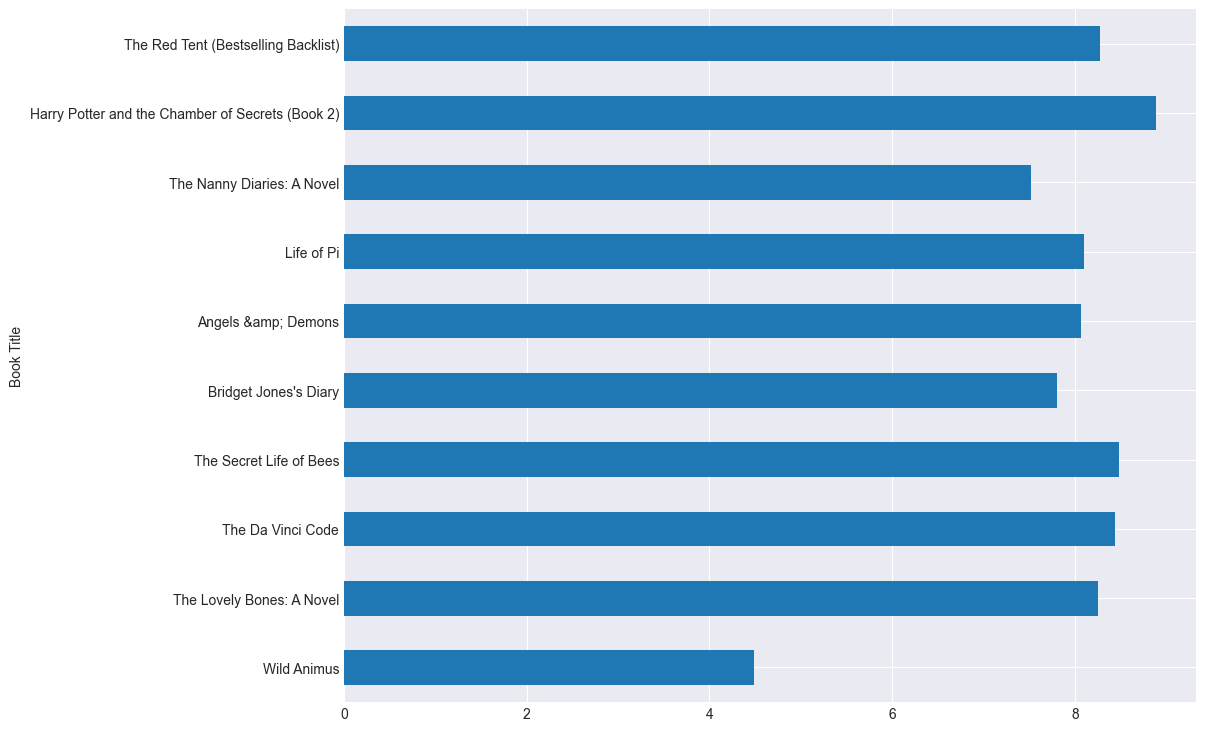

In [23]:
#Graphing 
plt.style.use('seaborn-darkgrid')
plt.figure()

#create horizontal bar graph
frequency_graph = rating_and_frequency['Average Rating'].plot(kind='barh', figsize=(11,9))
final_frequency.invert_yaxis()

#Title / Axioms
plt.title("Most Frequently Rated Books")
plt.ylabel("Book Titles")
plt.xlabel("Avg. Rating")
display()


This Bar Graph shows us that books which aren't frequently reviewed aren't rated the highest. Wild Animus has substantially lower ratings than The Lovely Bones, respectively rated at 4.85 and 8.25. 

# Books W/ High Frequency & High Ratings.

Since we have discovered that these books can be frequently reviewed without the highest ratings, I have decided to find books that are.

In [24]:

frequency = reviews_and_users[['Book Title', 'Book Rating', 'Frequency']].groupby('Book Title').mean().sort_values('Frequency', ascending=False).head(100)
highly_rated_and_frequent = frequency.sort_values('Book Rating', ascending=False).head(10)

highly_rated_and_frequent

,Book Rating,Frequency
Book Title,,
"The Two Towers (The Lord of the Rings, Part 2)",9.370370,108.0
Harry Potter and the Goblet of Fire (Book 4),9.247312,186.0
Harry Potter and the Sorcerer's Stone (Book 1),9.178571,140.0
Harry Potter and the Prisoner of Azkaban (Book 3),9.164319,213.0
Harry Potter and the Order of the Phoenix (Book 5),9.120879,182.0
Ender's Game (Ender Wiggins Saga (Paperback)),9.079208,101.0
"The Fellowship of the Ring (The Lord of the Rings, Part 1)",9.046358,151.0
To Kill a Mockingbird,9.020408,196.0
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),9.013761,218.0


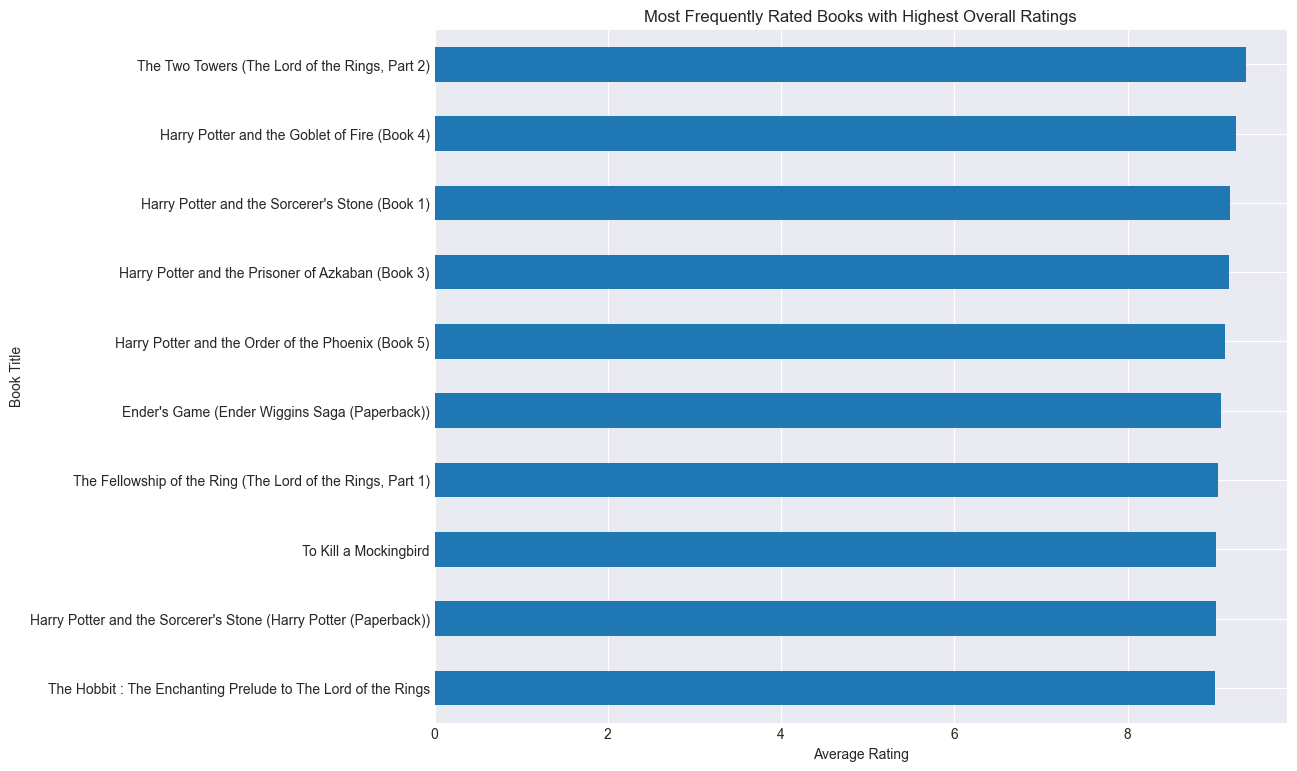

In [25]:
plt.style.use('seaborn-darkgrid')
plt.figure()


highly_rated_graph =highly_rated_and_frequent['Book Rating'].plot(kind='barh', figsize=(11,9))
highly_rated_graph.invert_yaxis()

plt.title("Most Frequently Rated Books with Highest Overall Ratings")
plt.ylabel("Book Title")
plt.xlabel("Average Rating");

#  Frequent Authors & High Ratings

Users can now search for the top ranking authors based on avg. ratings

In [26]:
#Creating a new 'Author Frequency' column based on the total of reviewed authors
reviews_and_users['Author Frequency'] = reviews_and_users['Book Author'].map(reviews_and_users['Book Author'].value_counts())

#two parter: get the frequency of Authors then the Ratings.
author_frequency = reviews_and_users[['Book Author', 'Book Rating', 'Author Frequency']].groupby('Book Author').mean().sort_values('Author Frequency', ascending=False).head(100)
highly_rated_author_frequency = author_frequency.sort_values('Book Rating', ascending=False).head(10)

highly_rated_author_frequency

,Book Rating,Author Frequency
Book Author,,
J. K. Rowling,9.054034,1351.0
J.R.R. Tolkien,9.018367,490.0
J. R. R. Tolkien,8.881671,431.0
C. S. Lewis,8.533835,399.0
Philip Pullman,8.494709,378.0
George Orwell,8.465986,294.0
Douglas Adams,8.390288,556.0
Madeleine L'Engle,8.372483,298.0
Roald Dahl,8.358491,371.0


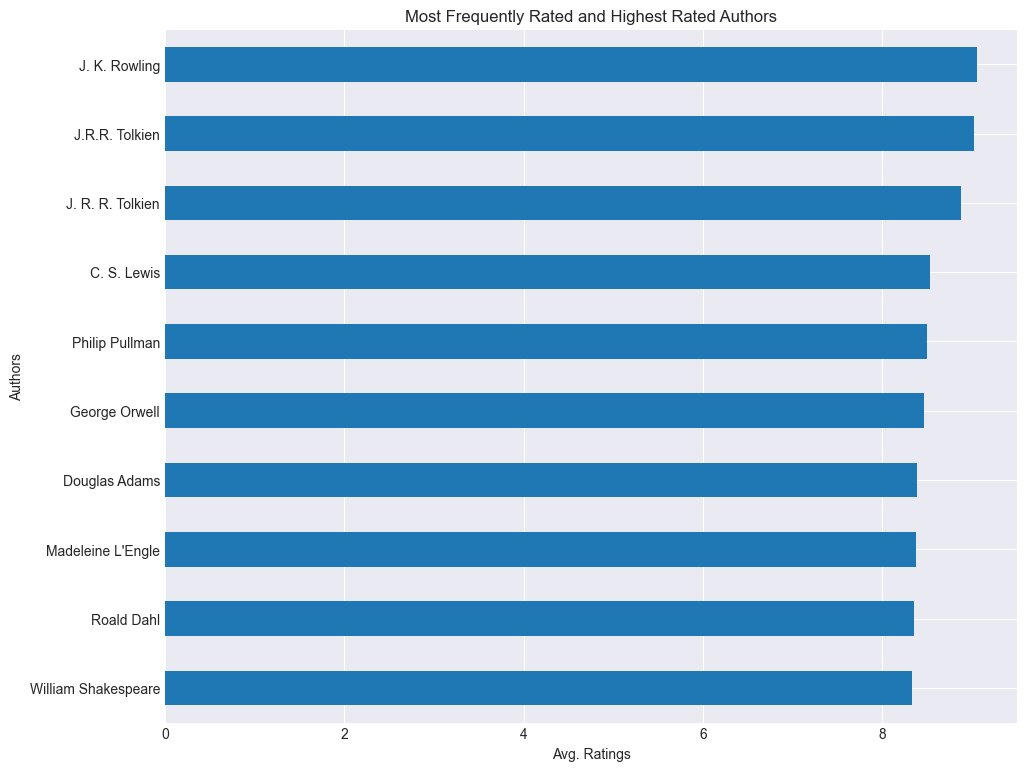

In [27]:
plt.style.use('seaborn-darkgrid')
plt.figure()

highest_rated_authors_graph = highly_rated_author_frequency['Book Rating'].plot(kind='barh', figsize=(11,9))
highest_rated_authors_graph.invert_yaxis()

plt.title("Most Frequently Rated and Highest Rated Authors")
plt.ylabel("Authors")
plt.xlabel("Avg. Ratings");

# High Ratings based on Country

In [28]:
ten_countries = [range(0,10,1)]
top_ten_countries = reviews_and_users['Country'].value_counts().reset_index().head(10)
top_ten_countries.index = top_ten_countries.index.astype(int)
top_ten_countries = top_ten_countries.rename(columns={'index': 'Country', 'Country': 'Count'})

countries = reviews_and_users[['Book Title', 'Country', 'Average Rating', 'Frequency']].groupby(['Book Title', 'Country']).mean().sort_values('Frequency', ascending=False).head(100)
countries = countries.sort_values(['Average Rating', 'Frequency'], ascending=False)
countries = countries.reset_index().rename(columns = {0: 'Book Read by Country Frequency'})
ratings_per_country = countries.groupby('Country').head(1)

country = ratings_per_country.merge(top_ten_countries, how='inner').sort_values(['Count'], ascending=False)      
country[['Country', 'Book Title']].style.hide_index()

/var/folders/6n/zr58hzps4cz7_n89qjnrzb5w0000gr/T/ipykernel_20723/2849814779.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  country[['Country', 'Book Title']].style.hide_index()


Country,Book Title
Usa,The Secret Life of Bees
Canada,The Secret Life of Bees
United Kingdom,The Secret Life of Bees
Germany,The Secret Life of Bees
Spain,The Secret Life of Bees
Australia,The Da Vinci Code
France,The Secret Life of Bees
Portugal,The Da Vinci Code
Malaysia,The Secret Life of Bees
Switzerland,The Lovely Bones: A Novel


# High Ratings By Age


In [29]:
ages = reviews_and_users.value_counts(['Age', 'Book Title', 'Average Rating']).to_frame().reset_index().rename(columns = {0: 'Book Read by Age Frequency'})
ages = ages.sort_values(['Book Read by Age Frequency', 'Average Rating'], ascending=False)
book_per_age = ages.groupby('Age').head(1)

df_no_indices = book_per_age[['Age', 'Book Title']].sort_values('Age', ascending=True).head(50)
df_no_indices.Age = df_no_indices.Age.astype(int)
df_no_indices.style.hide_index()

/var/folders/6n/zr58hzps4cz7_n89qjnrzb5w0000gr/T/ipykernel_20723/4281451725.py:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df_no_indices.style.hide_index()


Age,Book Title
10,Captain Underpants and the Wrath of the Wicked Wedgie Woman
11,Inuyasha (Inuyasha)
12,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
13,Harry Potter and the Chamber of Secrets (Book 2)
14,Wild Animus
15,Harry Potter and the Goblet of Fire (Book 4)
16,The Hobbit : The Enchanting Prelude to The Lord of the Rings
17,The Lovely Bones: A Novel
18,Harry Potter and the Chamber of Secrets (Book 2)
19,The Catcher in the Rye


# High Ratings based on Country & Age

In [30]:
country_age = reviews_and_users.value_counts(['Country', 'Age', 'Book Title', 'Average Rating']).to_frame().reset_index().rename(columns = {0: 'Book Read by Country Frequency'})
country_age = country_age.sort_values(['Book Read by Country Frequency', 'Average Rating'], ascending=False)
top_books = country_age.groupby(['Country', 'Age']).head(1)

top_books_age_country = top_books[['Country', 'Age', 'Book Title']].head(25)

top_books_age_country.Age = top_books_age_country.Age.astype(int)

top_books_age_country.sort_values('Age', ascending=True).style.hide_index()

/var/folders/6n/zr58hzps4cz7_n89qjnrzb5w0000gr/T/ipykernel_20723/1694954971.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  top_books_age_country.sort_values('Age', ascending=True).style.hide_index()


Country,Age,Book Title
Usa,17,Coal: A Human History
Usa,18,Simisola
Usa,19,The Catcher in the Rye
Usa,24,Harry Potter and the Chamber of Secrets (Book 2)
Usa,25,The Lovely Bones: A Novel
Usa,26,The Da Vinci Code
Usa,27,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Usa,28,The Lovely Bones: A Novel
Usa,29,The Da Vinci Code
Usa,30,The Lovely Bones: A Novel
